In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics

In [39]:
file_name = "spotify_utf.csv"
df_data = pd.read_csv(file_name)
df_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928/9/25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [40]:
df_data_clear = df_data.drop(columns=['id','release_date','mode'])
df_data_clear = df_data_clear.drop(df_data_clear[df_data_clear['year']<1950].index)
df_data_clear = df_data_clear.drop(df_data_clear[df_data_clear['popularity']<=2].index)
df_data_clear

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,name,popularity,speechiness,tempo,valence,year
1151,0.9850,"['Franz Schubert', 'Isaac Stern']",0.364,248627,0.0552,0,0.537000,2,0.0946,-23.253,"Sonata for Violin and Piano No. 1 in D Major, ...",4,0.0438,123.672,0.3180,1950
1198,0.0550,"['Marika Rossa', 'Alberto Ruiz']",0.754,330000,0.7390,0,0.871000,7,0.1090,-6.333,Back To The Old School ( V2 ) - Original Stick,13,0.0636,128.005,0.2120,1951
1289,0.9900,['Sonny Terry'],0.616,152693,0.1210,0,0.771000,4,0.3160,-17.309,Alcoholic Blues,3,0.0641,83.076,0.8480,1952
1299,0.8660,['Wallace House'],0.663,195413,0.1500,0,0.000000,7,0.0758,-14.195,On Ilkley Moor Bar t'At,11,0.3220,69.256,0.6430,1952
1399,0.9790,"['Ludwig van Beethoven', 'Daniel Barenboim', '...",0.184,568880,0.0233,0,0.947000,11,0.0940,-30.240,Concerto for Piano and Orchestra No. 5 in E-Fl...,6,0.0368,67.309,0.0822,1953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,I Found You,70,0.0385,129.916,0.4720,2020


In [41]:
df_data_clear.duplicated().sum()
df_data_clear = df_data_clear[~df_data_clear.duplicated()==1]
df_data_clear.shape

(134183, 16)

In [42]:
df_data_clear["popularity"][df_data_clear.popularity<=50]=0
df_data_clear["popularity"][df_data_clear.popularity>50]=1

df_data_clear["popularity"].value_counts()

<ipython-input-42-f2f9a1a4a32a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_clear["popularity"][df_data_clear.popularity<=50]=0
D:\Anaconda\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-42-f2f9a1a4a32a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_clear["popularity"][df_data_clear.popularity>50]=1


0    98359
1    35824
Name: popularity, dtype: int64

In [43]:
X_col = ['acousticness', 'danceability', 'duration_ms', 'energy', 
          'instrumentalness', 'key', 'liveness', 'loudness', 
          'speechiness', 'tempo', 'valence','year','explicit']

X = df_data_clear[X_col]
Y = df_data_clear['popularity']

In [44]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.25, random_state=123)
X_test.shape

(33546, 13)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
%time clf.fit(X_train, Y_train)

Wall time: 438 ms


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [48]:
y_trainP =clf.predict(X_train)
y_testP = clf.predict(X_test)
print(y_trainP)
print(y_testP)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_testP)

[0 0 0 ... 0 0 0]
[1 0 0 ... 0 0 1]


0.8423955166040661

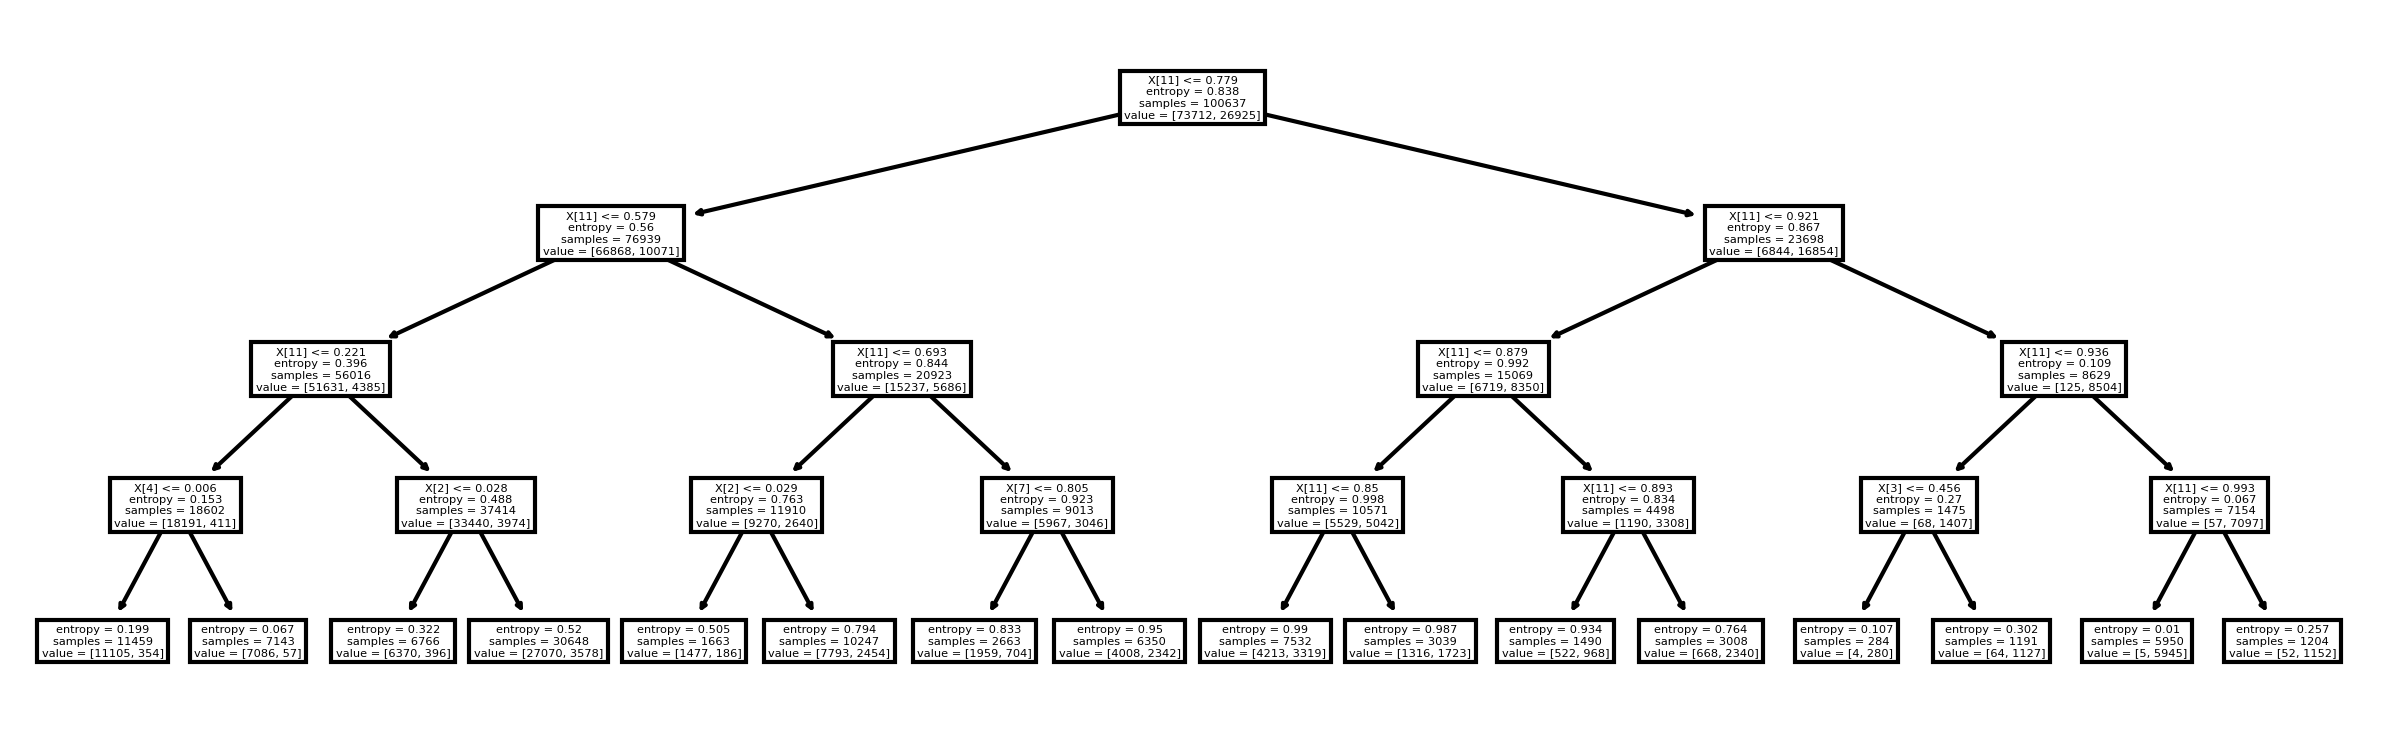

In [37]:
#plot_tree function
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
#宽10高3
plt.figure(figsize=(10, 3), dpi=300)
#The input is the tree you have trained(clf); features of data; 有一个stop的键？
tree_dot = plot_tree(clf)
plt.show()